## Regression

Regression is used when you try to find the relationship between variables.
<br>
In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

In [2]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

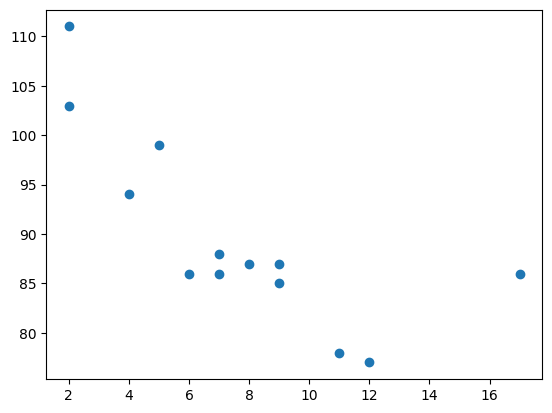

In [4]:
plt.scatter(x, y)
plt.show()

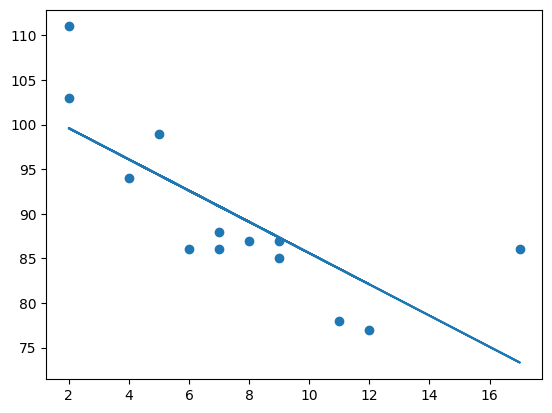

In [5]:
#stats.linregress() returns important key values of Linear Regression:


slope, intercept, r, p, std_err = stats.linregress(x, y)

#ymxfunc function uses slope and intercept to return a new value on y-axis to the corresponding x value :

def ymxfunc(x):
  return slope * x + intercept

#Create an array for y-axis from x array

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [7]:
#predict
speed = myfunc(10)
print(speed)

85.59308314937454


**Bad Fit**

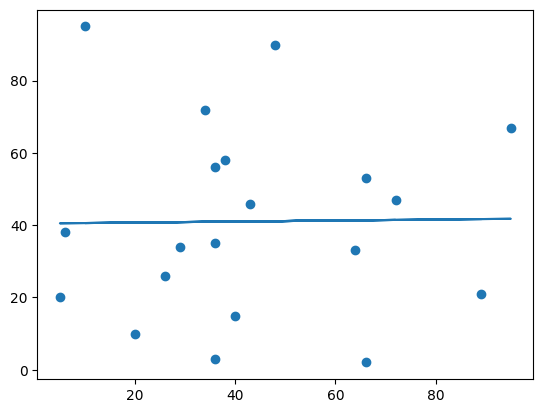

In [8]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

## Polynomial Regression
data points clearly will not fit a linear regression.
<br>
It uses the relationship between the variables x and y<br>
to find the best way to draw a line through the data points.

20 cars were passing a point.<br>
We record car's speed in kmph, time of day in hours
<br>
The x-axis represents the hours of the day
<br>y-axis represents the speed

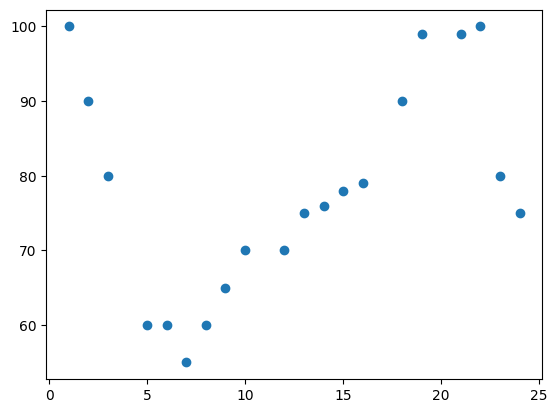

In [9]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23, 24]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,80, 75]

plt.scatter(x, y)
plt.show()

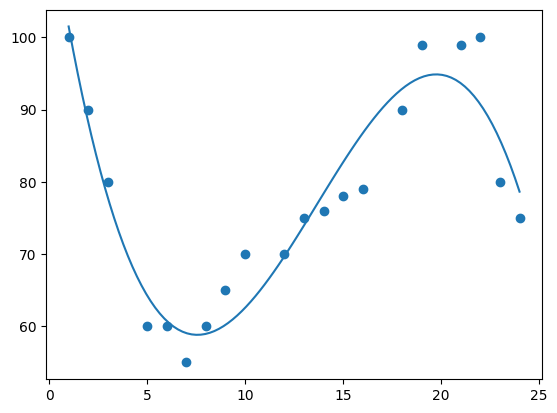

In [12]:
#draw the line of Polynomial Regression:

import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23, 24]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,80, 75]

#NumPy method to make a polynomial model
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

#specify how the line will display
#start at position 1, and end at position 24

myline = numpy.linspace(1, 24, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [15]:
#predict
speed = mymodel(17)
print(speed)

90.19467760221255


In [18]:
#draw the line of Polynomial Regression:

import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22,23, 24]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100,80, 75]

#NumPy method to make a polynomial model
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

#predict
speed = mymodel(17)
print(speed)




90.19467760221255


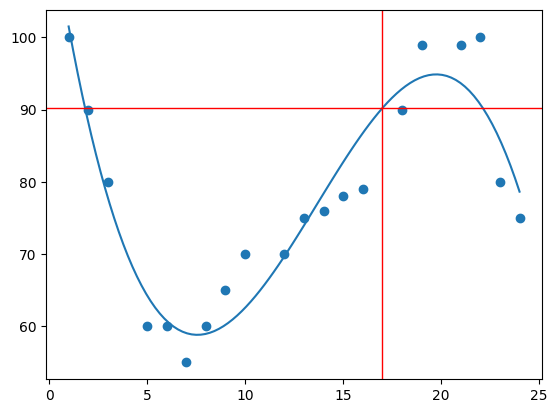

In [31]:
#specify how the line will display
#start at position 1, and end at position 24

myline = numpy.linspace(1, 24, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
x1, y1 = [0, speed], [17, speed]
x2, y2 = [17,0], [17, speed]
# Plot a horizontal line using axhline() in pyplot
plt.axhline(y=speed, xmin=0, xmax=25, color='r', linestyle='-', linewidth=1)
plt.axvline(x=17, ymin=0, ymax=100, color='r', linestyle='-', linewidth=1)
plt.show()

In [32]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("mr_data.csv")


In [33]:
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [42]:
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


coefficient is a factor that describes the relationship with an unknown variable.<br>

if x is a variable, then 2x is x two times. 
<br>
x is the unknown variable, and the number 2 is the coefficient.


In [43]:
print(regr.coef_)

[0.00755095 0.00780526]


In [44]:

#predict
predictedCO2 = regr.predict([[3300, 1300]])
print(predictedCO2)

[114.75968007]


## Scale Features
When the data has different values, or different measurement units, it can be difficult to compare them. 
<br>
What is kilograms compared to meters?<br>
Altitude compared to time?
<br>
scaling data into new values help comparission.
<br>
<br>
here volume column contains values in liters instead of cm3 (1.0 instead of 1000).

In [46]:
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


**The formula for scaling**
z = (x - u) / s<br>
z is the new value<br>
x is the original value<br>
u is the mean and s is the standard deviation.

In [53]:
df.iloc[:1]

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99


In [51]:
df.describe()[0:3]

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571


In [59]:
#weight
w1=(790 - 1292.27 )/ 242.12
#volume*
v1=(1000 - 1611.11) / 388.97
print(w1,v1)

#Now we can compare -2.1 with -1.57 


-2.0744672063439618 -1.571098028125562


In [60]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("mr_data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


## Evaluate Your Model
In ML we create models to predict the outcome of certain events
<br>
We can use Train/Test method for builiding our model


**Random samples from a normal (Gaussian) distribution.**<br>
<br>loc - mean of the distribution.
<br>scale - Standard deviation (spread) of the distribution. 
<br>size - Output shape. for (m, n, k): m * n * k samples are drawn.


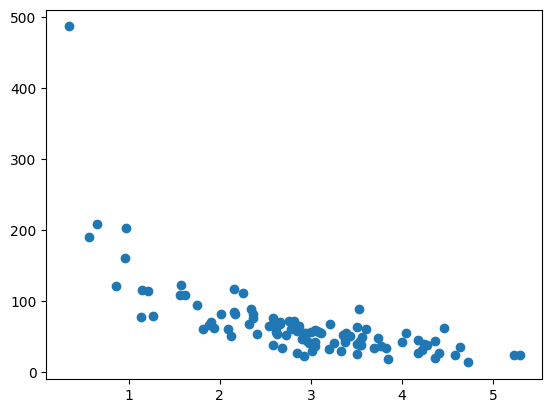

In [67]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100)/ x

plt.scatter(x, y)
plt.show()

In [68]:
#Split into train/test 80:20 basis

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

In [71]:
test_y

array([ 72.37873053,  55.46264153,  34.46826737,  40.15213735,
        70.55883508, 108.46604975,  21.035144  ,  32.35727584,
        64.76189111,  52.19177448,  55.71813453,  50.5667094 ,
        32.65308038,  27.61777936,  80.14230427,  54.98360439,
        46.50723143,  61.85229524,  45.84155234, 208.47130994])

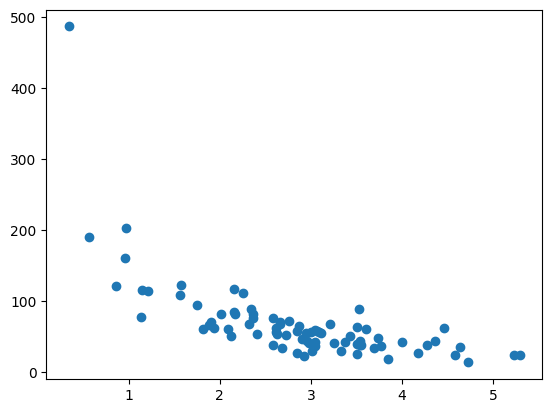

In [72]:
plt.scatter(train_x, train_y)
plt.show()

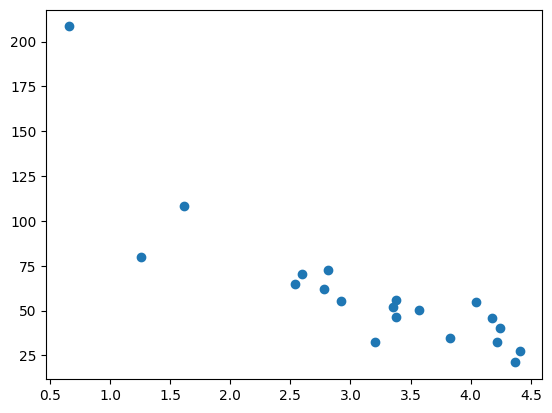

In [73]:
plt.scatter(test_x, test_y)
plt.show()

**Fit the Data Set**
What does the data set look like? <br>
The polynomial regression would be the best<br>


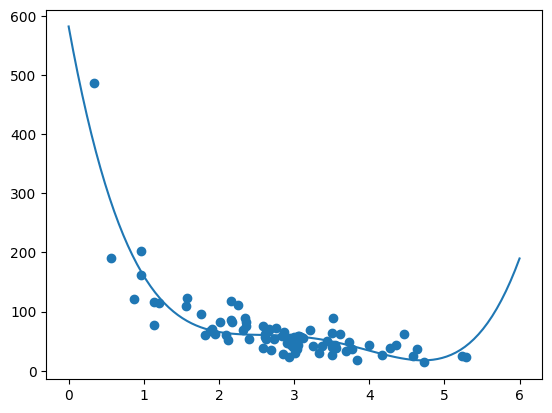

In [74]:
mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

If a customer spending 6 minutes in the shop would make a purchase worth 200. That is probably a sign of overfitting.<br><br>

The R-squared (R2) score is a good indicator of how well the data set is fitting the model.<br>

R2 measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1, where 0 means no relationship, and 1 means totally related.<br>

The sklearn module has a method called r2_score() that will help us find this relationship.


In [76]:
from sklearn.metrics import r2_score
r2 = r2_score(train_y, mymodel(train_x))
print(r2)

0.7988645544629793


The result 0.799 shows that there is a OK relationship.

In [77]:
#check testing set
r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343643


In [78]:
#predit values
#How much money will a buying customer spend
#if she or he stays in the shop for 5 minutes?
print(mymodel(5))

22.879625918121974
